In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [2]:
X=np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],
                  [0.403,0.237],[0.481,0.149],[0.437,0.211],[0.666,0.091],[0.243,0.267],
                  [0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],
                  [0.593,0.042],[0.719,0.103],[0.359,0.188],[0.339,0.241],[0.282,0.257],
                  [0.748,0.232],[0.714,0.346],[0.483,0.312],[0.478,0.437],[0.525,0.369],
                  [0.751,0.489],[0.532,0.472],[0.473,0.376],[0.725,0.445],[0.446,0.459]])

In [48]:
n_samples = X.shape[0]
print(n_samples)
k = 5
init_index = [int(np.random.random() * n_samples) for _ in range(k)]
init_index

30


[24, 0, 20, 8, 22]

In [50]:
u= [X[index] for index in init_index]
u

[array([0.525, 0.369]),
 array([0.697, 0.46 ]),
 array([0.748, 0.232]),
 array([0.666, 0.091]),
 array([0.483, 0.312])]

In [36]:
test1 = np.array([0.634, 0.264])
test2 = np.array([0.627, 0.262])
result = np.sqrt(np.sum(np.square(test1 - test2)))
result

0.007280109889280525

In [52]:
C = {0: [5, 7, 9, 10, 11, 17, 18, 19],
      1: [2, 13, 20],
      2: [3, 14, 22, 23, 24, 26, 27, 29],
      3: [0, 1, 21, 25, 28],
      4: [4, 6, 8, 12, 15, 16]}

print("X[C[1]]: ",X[C[1]])
print("u[1]: ",u[1])
print((np.sum(X[C[1]], axis=0)+u[1] ) / (len(C[1]) + 1))

X[C[1]]:  [[0.634 0.264]
 [0.657 0.198]
 [0.748 0.232]]
u[1]:  [0.697 0.46 ]
[0.684  0.2885]


In [75]:
class Kmeans:
    def __init__(self, k, maxIter):
        self.count=0
        self.k = k 
        self.maxIter = maxIter #最大更新次数
        
    def fit(self, X):
        
        #图9.24
        n_samples = X.shape[0] # 获取输入样本的维度
        print("n_sample:", n_samples)
        init_index = [int(np.random.random() * n_samples) for _ in range(self.k)] #创建一个基于上面给的维度范围中的一个 维度为k的数组的index（选择的数值是随机的）
                                                                                # n_samples = 30 --> 该例子中，X的shape[0] = 30
                                                                                # k = 5
                                                                                # init_index = [int(np.random.random() * n_samples) for _ in range(k)]
                                                                                # init_index
                                                                                # >>> [2, 2, 0, 24, 23]
        
        
        u = [X[index] for index in init_index] #! line1 - 初始化均值向量 - 从原样本 中随机选择k个样本 作为 初始均值向量 {miu1, miu2, ... , miuk}
                                                                                # u= [X[index] for index in init_index]
                                                                                # u
                                                                                # >>> [array([0.634, 0.264]),
                                                                                # >>>  array([0.634, 0.264]),
                                                                                # >>>  array([0.697, 0.46 ]),
                                                                                # >>>  array([0.525, 0.369]),
                                                                                # >>>  array([0.478, 0.437])]
        print("len of u: ",len(u))
        print("k value: ",self.k)
        for _ in range(self.maxIter):   
            C = {}
            for c in range(self.k): #!line 3 - 令Ci = 给定的区间 [1, k] 
                C[c] = []
            
            for j in range(n_samples):   #!line 4-7 
                                            #遍历所有样本值， 
                                            # 针对每个样本值， 和 随机选出的u 中的值（centroids） 来计算距离， 
                                            # 并且确定标记点（的index）
                                            
                dji_min = float('inf')    #* 初始化最大距离
                lambdaj = None  #* 初始化最大距离对应的index
                for u_ in range(self.k): #根据随机选出的样本的数量，进行循环更新， 其实这里放 k 也没问题
                    dji = np.sqrt(np.sum(np.square(X[j] - u[u_])))   #! line 5 - 计算样本 x[j] 与各个均值向量（随机样本） u[u_] 的距离
                    if dji < dji_min:
                        dji_min = dji #* 根据 距离最近的均值向量 来确定x[j] 的 cluster标记 -> lambdaj
                        lambdaj = u_ # 一个一个点进行比较， 确定标记点
                                                    #? 举例子：
                                                    # 当 j = 10， k = 5， dji_max = 0.0， lambdaj = 0
                                                    # X[j] = X[10] = [0.634, 0.264] 
                                                    # u[u_] = u[0] = [0.624, 0.243]
                                                    
                                                    # 第一轮：（u_ = 0）
                                                        # dji = 0.023259
                                                        # if dji < dji_min      -->   0.023259 < 无穷大
                                                        # 则 dji_min = dji      -->   dji_min = 0.023259
                                                        # lambdaj = u_          -->   lambdaj = 0
                                                    
                                                    # 更新： j = 10， k = 5， dji_min = 0.023259， lambdaj = 0
                                                    # 第二轮：(u_ = 1)
                                                        # X[j] = X[10] = [0.634, 0.264] 
                                                        # u[u_] = u[1] = [0.604, 0.283]
                                                        #  dji = 0.03551
                                                        # if dji < dji_min      -->   0.03551 < 0.023259    --> 不成立
                                                        # 保持第一轮结果
                                                        # lambdaj = 0          -->   lambdaj = 0   
                                                    
                                                    # 更新 ： j = 10， k = 5， dji_min = 0.03551， lambdaj = 1
                                                    # 第三轮：(u_ = 2)
                                                        # X[j] = X[10] = [0.634, 0.264]
                                                        # u[u_] = u[2] = [0.627, 0.262 ]
                                                        # dji = 0.00728
                                                        # if dji < dji_min      -->   0.00728 < 0.03551     --> 成立
                                                        # 保持第二轮的结果
                                                    #* 假设 最终的结果都是相同的， 即 dji_min = 0.03551， lambdaj = 1
                                                    #* 于是，我们将dji_min的最小值 所对应的 lambdaj的值 存储到 C的位置中
                                                    #* 在将上一层的for loop遍历的 j（array） 放进C[lambdaj]中 
                    self.count += 1 
                    # 由于是 每一个点对应 随机样本的 x[j] 来匹配距离，所以两个for loop的循环次数是： 样本数量 * 随机样本数量 (30 * 5)
                    # 又因为有 迭代数量maxIter, 所以循环次数是： maxIter * 样本数量 * 随机样本数量 (100 * 30 * 5) = 15000
                C[lambdaj].append(j) #! line 7 - 将样本 xj 划入相应的簇 (直接append 不需要再赋值，不然是None)
            finish = True
            
            for i in range(self.k): #! line 9-16
                u_new = (np.sum(X[C[i]], axis=0)+u[i] ) / (len(C[i]) + 1) #! line 10 - 计算新均值向量 （按列求均值） 
                                                    #? 举例子
                                                    # C = {0: [5, 7, 9, 10, 11, 17, 18, 19],
                                                    #           1: [2, 13, 20],
                                                    #           2: [3, 14, 22, 23, 24, 26, 27, 29],
                                                    #           3: [0, 1, 21, 25, 28],
                                                    #           4: [4, 6, 8, 12, 15, 16]}

                                                    # print("X[C[1]]: ",X[C[1]])
                                                    # print("u[1]: ",u[1])
                                                    # print("miu_new: ", (np.sum(X[C[1]], axis=0)+u[1] ) / (len(C[1]) + 1))
                                                    
                                                    # >>> X[C[1]]:  [[0.634 0.264]
                                                    # >>>           [0.657 0.198]
                                                    # >>>           [0.748 0.232]]
                                                    
                                                    # >>> u[1]:     [0.697 0.46]
                                                    #* >>> miu_new: [0.684  0.2885]
                
                x_pos = u_new[0] - u[0] #! line 11（前期赋值） - 计算新均值向量与旧均值向量的差值
                y_pos = u_new[1] - u[1]
                
                if (np.linalg.norm([x_pos, y_pos])) > 0 : #! line 11 - if (miu_new - miu) != 0   (由于计算精度等问题，采用这样比较两向量是否一致)
                    # 这里将两个值相减，是将x、y的点代入欧式距离，得到向量长度，如果大于0，则说明有变化，则继续迭代
                    finish = False
                    u[i] = u_new #! 将当前均值向量 miu 更新称为 miu_new
                
            if finish:
                break

        return C, u

In [72]:
miu = [[0.403, 0.237],
      [0.343, 0.099],
      [0.478, 0.437]]

x1 = [0.697, 0.460]
for i in range(3):
      x = miu[i][0] - x1[0]
      y = miu[i][1] - x1[1]
      vector = np.linalg.norm([x, y])
      print(vector)

0.3690054200143949
0.5056055775008815
0.22020445045457185


n_sample: 30
len of u:  3
k value:  3


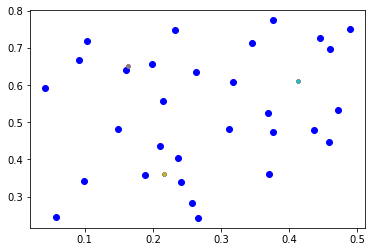

In [94]:
kmeans = Kmeans(k=3, maxIter = 4)
C, u= kmeans.fit(X) # u 就是更新完成后的 中心点

colors = ['r', 'b', 'y']

for i in range(len(C)):
      for j in C[i]:
            plt.scatter(X[j][1], X[j][0], c=colors[i])
            plt.scatter(u[i][1], u[i][0], marker='.')